# Bank Dataset

Importing Libraries

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt

Loading data from .csv file

In [87]:
bank_df=pd.read_csv('bank_marketing_1.txt')

Inspecting the dataset

In [88]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [69]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Validating the duplicate data

In [41]:
bank_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [67]:
bank_df.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Training and Test the dataset

In [89]:
bank_df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [90]:
bank_df["y"].replace({"yes": 1, "no": 0}, inplace=True)

In [91]:
label=bank_df.y.value_counts()
print(label)

0    39922
1     5289
Name: y, dtype: int64


In [92]:
imbalance_dataset=(label[0]/(label[1]+label[0]))*100
print(imbalance_dataset)

88.30151954170445


In [42]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [49]:
# Converting string variables to a categorical
from sklearn.preprocessing import LabelEncoder

d[["job"]] = d[["job"]].apply(LabelEncoder().fit_transform)
d[["marital"]] = d[["marital"]].apply(LabelEncoder().fit_transform)
d[["education"]] = d[["education"]].apply(LabelEncoder().fit_transform)
d[["default"]] = d[["default"]].apply(LabelEncoder().fit_transform)
d[["housing"]] = d[["housing"]].apply(LabelEncoder().fit_transform)
d[["contact"]] = d[["contact"]].apply(LabelEncoder().fit_transform)
d[["month"]] = d[["month"]].apply(LabelEncoder().fit_transform)
d[["loan"]] = d[["loan"]].apply(LabelEncoder().fit_transform)
d[["poutcome"]] = d[["poutcome"]].apply(LabelEncoder().fit_transform)

d.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,yes
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,yes
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,yes
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,yes
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,yes


In [51]:
# Partitioning the data into X and y
X=d.iloc[:,1:16]
y=d.iloc[:,16:17]
d

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,yes
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,yes
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,yes
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,yes
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,no
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,no
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,no
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,no


# Decision Tree Classifier using Supervised Learning 

All DT scores: 
{'fit_time': array([0.00599313, 0.00599647, 0.00599623, 0.0069952 , 0.0059967 ,
       0.00701499, 0.00599623, 0.00899291, 0.00599551, 0.00601459]), 'score_time': array([0.00199962, 0.00401998, 0.00199914, 0.00197983, 0.0019989 ,
       0.0019989 , 0.00197983, 0.00199866, 0.00200033, 0.00199914]), 'test_score': array([0.62946429, 0.71428571, 0.65625   , 0.69506726, 0.68609865,
       0.7309417 , 0.73542601, 0.73991031, 0.71748879, 0.70852018])}
Accuracy mean is:  0.7013452914798206
              precision    recall  f1-score   support

          no       0.77      0.70      0.73      1137
         yes       0.72      0.78      0.75      1096

    accuracy                           0.74      2233
   macro avg       0.74      0.74      0.74      2233
weighted avg       0.74      0.74      0.74      2233



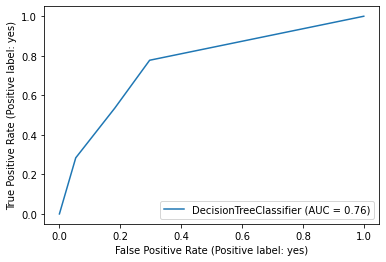

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate


from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dt_clf = DecisionTreeClassifier(criterion="gini", random_state=10, max_depth=2, min_samples_leaf=4)

dt_clf.fit(X_train, y_train)

old_dt_scores = cross_validate(dt_clf, X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=dt_clf.predict(X_test)
#Output
print("All DT scores: ")
print(old_dt_scores)
print("Accuracy mean is: ", old_dt_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(dt_clf, X_test, y_test.values.ravel())
mplt.show() 

# Random Forest Classifier

C:\Users\suchi\AppData\Local\Temp/ipykernel_17860/1190711590.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


Random Forest scores: 
{'fit_time': array([0.23688555, 0.25083447, 0.26185155, 0.27382612, 0.23786378,
       0.30980515, 0.26584744, 0.21987438, 0.24186039, 0.22487068]), 'score_time': array([0.0139904 , 0.02498674, 0.01600885, 0.02200603, 0.01698947,
       0.0180068 , 0.01399159, 0.01697016, 0.0179894 , 0.01499128]), 'test_score': array([0.76785714, 0.78125   , 0.75      , 0.77130045, 0.79372197,
       0.79372197, 0.78923767, 0.78026906, 0.81165919, 0.8161435 ])}
Approximate mean is: 0.7855160954516336
              precision    recall  f1-score   support

          no       0.80      0.80      0.80      1137
         yes       0.79      0.79      0.79      1096

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233



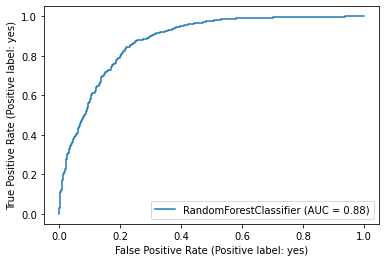

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from ipykernel import kernelapp as app

#Random Forest Classifier initialise
rf_clf = RandomForestClassifier(criterion="gini", random_state=10, max_depth=4, min_samples_leaf=4)

#RF_Classifier Training
rf_clf.fit(X_train, y_train)

#Cross Validating RF
old_rf_scores =cross_validate(rf_clf, X_test, y_test.values.ravel(), cv=10)

y_prodcut = rf_clf.predict(X_test)

#Output
print("Random Forest scores: ")
print(old_rf_scores)

print("Approximate mean is:", old_rf_scores['test_score'].mean())

print(classification_report(y_test, y_prodcut))
plot_roc_curve(rf_clf, X_test, y_test.values.ravel())
mplt.show() 